In [17]:
!pip install langgraph

In [18]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START , END

In [19]:
class AgentState(TypedDict):
  name: str
  age: str
  skills: List[str]
  result: str

In [20]:
def firstNode(state: AgentState) -> AgentState:
   """this is first node"""
   state['result'] = "Hey! " + state['name'] + " welcome to my system"

   return state

def secondNode(state: AgentState) -> AgentState:
  """this is second node"""

  skills = ",".join(state['skills'])
  state['result'] = state['result'] + " ,your have skills in " + skills

  return state

def thirdNode(state: AgentState) -> AgentState:
  """this is third node"""

  state['result'] = state['result'] + " you are " + state['age'] + "years old"

  return state

In [21]:
graph= StateGraph(AgentState)

graph.add_node('firstNode', firstNode)
graph.add_node('secondNode', secondNode)
graph.add_node('thirdNode', thirdNode)

graph.add_edge(START, 'firstNode')
graph.add_edge('firstNode', 'secondNode')
graph.add_edge('secondNode', 'thirdNode')
graph.add_edge('thirdNode', END)

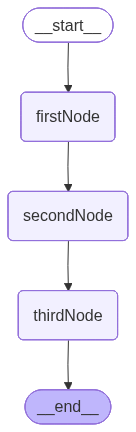

In [22]:
bot = graph.compile()

bot

In [23]:
employee = {
    "name": "dungbt",
    "skills": ["python", "php", "AI", "Air Blade"],
    "age": "39"
}


print(bot.invoke(employee))

{'name': 'dungbt', 'age': '39', 'skills': ['python', 'php', 'AI', 'Air Blade'], 'result': 'Hey! dungbt welcome to my system ,your have skills in python,php,AI,Air Blade you are 39years old'}
